In [1]:
## importing libraries.

import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

## Exploring Data 

In [3]:
len(X_train), len(X_test)

(60000, 10000)

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# Scaling values 
# previous values range(0-255)  -->  after scaling reange(0-1)

X_train = X_train/255
X_test = X_test/255

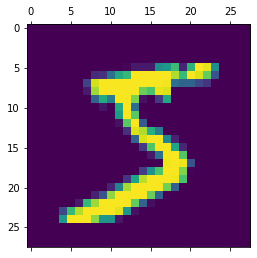

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
# we are doing this because we will give input in form of (727,) vector input
# not in form of 28*28 grid

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape , X_test_flattened.shape

((60000, 784), (10000, 784))

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

So Now, Input has been converted into vector of size (784,) from a 28x28 grid.

## Creating Neural Network

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')  #(output_neurons, input_neurond, activation_function)
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4716 - accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2621 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2561 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2531 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9265


[0.2660977244377136, 0.9265000224113464]

In [14]:
y_predict = model.predict(X_test_flattened)

In [15]:
## Testing model.

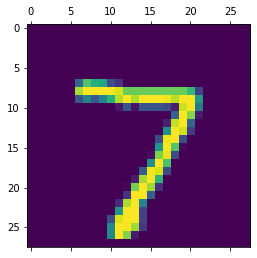

In [16]:
plt.matshow(X_test[0]) 

In [17]:
y_predict[0]

array([2.7119815e-03, 2.3116133e-08, 1.1052102e-02, 9.5941013e-01,
       6.6682696e-04, 1.4371461e-01, 4.2950859e-08, 9.9982297e-01,
       9.5949620e-02, 6.5903872e-01], dtype=float32)

In [18]:
np.argmax(y_predict[0])          # Returns the indices of the maximum values along an axis.

7

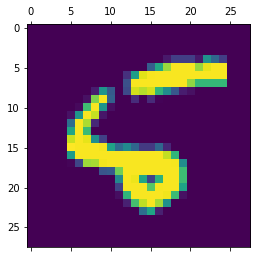

In [19]:
plt.matshow(X_test[8])

In [20]:
np.argmax(y_predict[8])          # Returns the indices of the maximum values along an axis.

6

In [21]:
## Confusion matrix

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
y_predicted_values = [np.argmax(i) for i in y_predict]
y_predicted_values[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_values)  
cm
    
    #predictions	1-D Tensor of predictions for a given classification.
    #labels	1-D Tensor of real labels for the classification task.

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    6,    6,    3,    3,    0],
       [   0, 1118,    3,    3,    0,    1,    3,    2,    5,    0],
       [   5,   12,  920,   19,    6,    5,   11,    8,   42,    4],
       [   1,    0,   16,  923,    1,   26,    2,    9,   26,    6],
       [   2,    2,    5,    2,  912,    0,   10,    4,   11,   34],
       [   7,    2,    1,   32,    7,  788,   11,    7,   31,    6],
       [  11,    3,    9,    1,    7,   20,  902,    2,    3,    0],
       [   1,    7,   22,    9,    6,    1,    0,  945,    5,   32],
       [   5,   13,    6,   17,    9,   28,    8,    9,  871,    8],
       [   9,    8,    1,    9,   20,    5,    0,   18,   13,  926]])>

Text(69.0, 0.5, 'Truth')

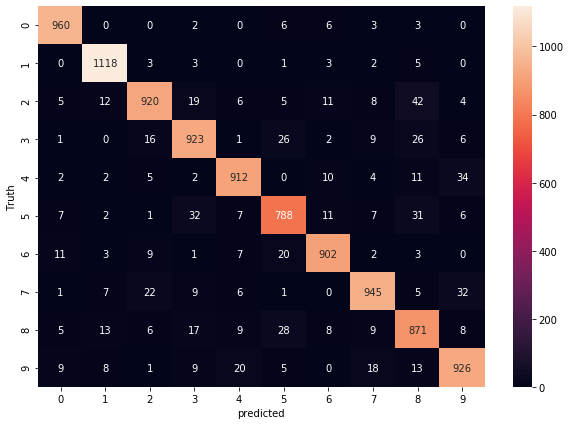

In [25]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

We can see that, when Truth value was 0 model predicted 964 times as 0 , 0 times as 1, 1 times as 2 and so on.

## Adding hidden layers

In [26]:
model_1 = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'sigmoid'), # hidden layer 1 with 100 neurons
    keras.layers.Dense(10,  activation = 'sigmoid')             #(output_neurons, input_neurond, activation_function)
])                                                        # we don't have to specify input_shape in output layer now

model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_1.fit(X_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.8937
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2000 - accuracy: 0.9430
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1479 - accuracy: 0.9574
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9666
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0934 - accuracy: 0.9735
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9782: 0s - loss: 0.0773 - accu
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0551 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0475 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] -

In [27]:
model_1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9751


[0.0785369798541069, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

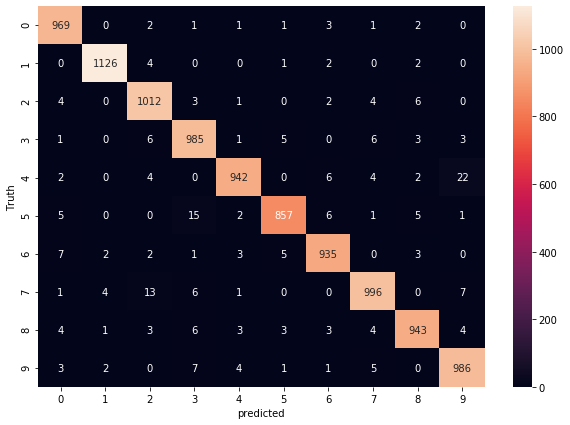

In [28]:
y_predict_model_1 = model_1.predict(X_test_flattened)
y_predicted_values_model_1 = [np.argmax(i) for i in y_predict_model_1]

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_values_model_1)  
cm

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Here, we can cleraly see that as we've introduced a hidden layer model's accuracy is increased.

Note :- Chosing the number of neurons in hidden layer is a hit & trial method.

### What if, you dont want to flatten input data

In [31]:
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'sigmoid'), 
    keras.layers.Dense(10,  activation = 'sigmoid')            
])                                                        

model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_2.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4139 - accuracy: 0.8949
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2022 - accuracy: 0.9422
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1494 - accuracy: 0.9568
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1176 - accuracy: 0.9663
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0956 - accuracy: 0.9728
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9808
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9837
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0501 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.043

Text(69.0, 0.5, 'Truth')

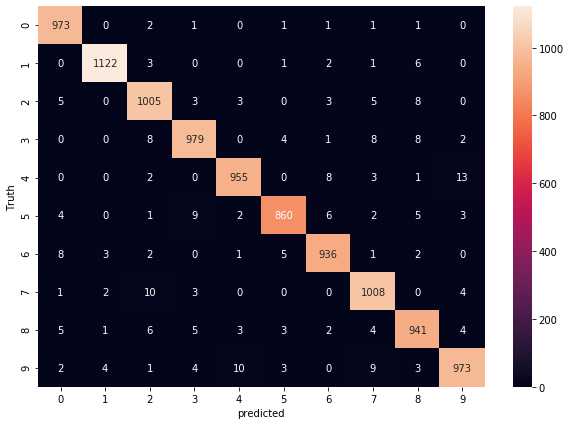

In [35]:
y_predict_model_2 = model_2.predict(X_test)
y_predicted_values_model_2 = [np.argmax(i) for i in y_predict_model_2]

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_values_model_2)  
cm

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')